In [9]:
import blur_detector
import cv2
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import datetime

import glob

Update the path before execution. Relative path did not work for me.

In [ ]:
PATH = '/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/detectors/blur/blur_detector/'
all_images = glob.glob("../../../dataset/valid/*.JPG")

In [ ]:
print(all_images)

In [11]:
def logger(image, blur_amount, blur_mean_1, blur_mean_2, path="./"):
    time_str = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    df_headers = pd.DataFrame({
        'log_time': [time_str],
        'image': [image],
        'gaussian_blur': [blur_amount],
        'blur_mean_1': [blur_mean_1],
        'blur_mean_2': [blur_mean_2]
    })
    df_headers.to_csv(
        path,
        mode='a', index=False, header=False)

In [12]:
def get_blur_mean(img):
    blur_map = blur_detector.detectBlur(
        img,
        downsampling_factor=4,
        num_scales=4,
        scale_start=2,
        num_iterations_RF_filter=3
    )
    return np.mean(blur_map)

### Blur value means
Kept in arrays to plot separately.

In [13]:
original_vals = []
gaussian_blur3_vals = []
gaussian_blur5_vals = []
gaussian_blur7_vals = []

# Run for the valid dataset

In [14]:
for j in range(0, len(all_images)):
    image_name = all_images[j]
    img = cv2.imread(image_name, 0)
    blur_map_original_img = get_blur_mean(img)
    original_vals.append(blur_map_original_img)


    for i in range(3, 8, 2):
        blur_factor = i

        img2 = cv2.GaussianBlur(img, (blur_factor, blur_factor), 0)

        blur_map_blurred_img = get_blur_mean(img2)
        if i == 3:
            gaussian_blur3_vals.append(blur_map_blurred_img)
        if i == 5:
            gaussian_blur5_vals.append(blur_map_blurred_img)
        else:
            gaussian_blur7_vals.append(blur_map_blurred_img)

        logger(
            image_name,
            blur_factor,
            blur_map_original_img,
            blur_map_blurred_img,
            PATH + 'blur_logs.csv'
        )

[|                  ] 10%
[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%
[| | | | | | |      ] 70%
[| | | | | | | |    ] 80%
[| | | | | | | | |  ] 90%
[| | | | | | | | | |] 100%
[|                  ] 10%


/Users/raminduwalgama/anaconda3/envs/icao-server/lib/python3.10/site-packages/blur_detector/__init__.py:243: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  local_entropy = self.entropyFilt(T_max)


[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%
[| | | | | | |      ] 70%
[| | | | | | | |    ] 80%
[| | | | | | | | |  ] 90%
[| | | | | | | | | |] 100%
[|                  ] 10%
[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%
[| | | | | | |      ] 70%
[| | | | | | | |    ] 80%
[| | | | | | | | |  ] 90%
[| | | | | | | | | |] 100%
[|                  ] 10%
[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%
[| | | | | | |      ] 70%
[| | | | | | | |    ] 80%
[| | | | | | | | |  ] 90%
[| | | | | | | | | |] 100%
[|                  ] 10%
[| |                ] 20%
[| | |              ] 30%
[| | | |            ] 40%
[| | | | |          ] 50%
[| | | | | |        ] 60%
[| | | | | | |      ] 70%
[| | | | | | | |    ] 80%
[| | | | | | | | |  ] 90%
[| | | | 

## Display images and blur maps

In [15]:
        # cv2.imshow('ori_img', img)
        # cv2.imshow('GaussianBlur', img2)
        # cv2.imshow('blur_map', blur_map_original_img)
        # cv2.imshow('gaussian_blur_map', blur_map_blurred_img)
        #
        # # cv2.imshow('ori_img2', img2)
        # # cv2.imshow('blur_map2', blur_map2)
        # cv2.waitKey(0)

## Histograms

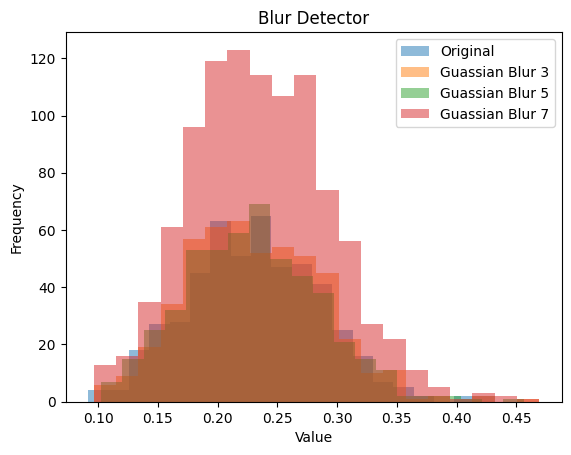

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the histograms
n_bins = 20  # Number of bins in the histogram
ax.hist(original_vals, bins=n_bins, alpha=0.5, label='Original')
ax.hist(gaussian_blur3_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 3')
ax.hist(gaussian_blur5_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 5')
ax.hist(gaussian_blur7_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 7')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Blur Detector')

# Add legend
ax.legend()
plt.savefig(PATH + 'blur_detector_histogram.png')

# Show the plot
plt.show()
